In [1]:
#引用资源
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [4]:
#查看数据集
faces = fetch_lfw_people()
faces.data.shape

(13233, 2914)

In [5]:
#转换成平面：images是将我们的数据集以一个二维平面可视化的角度展现出来
faces.images.shape

(13233, 62, 47)

In [6]:
#随机获取36张脸
import numpy as np
random_indexs = np.random.permutation(len(faces.data))
X = faces.data[random_indexs]
example_faces = X[:36,:]
example_faces.shape

(36, 2914)

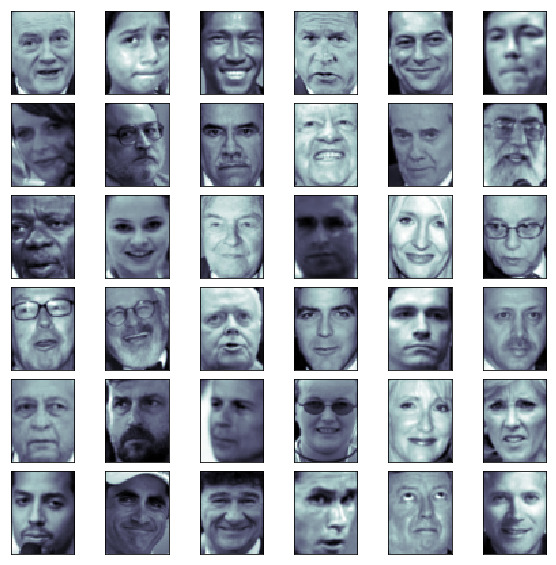

In [7]:
#绘制这些人脸
def plot_digits(data):
    fig,axes = plt.subplots(6,6,figsize=(10,10),
    subplot_kw={'xticks':[],'yticks':[]},
    gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(62,47),cmap='bone')
    
plot_digits(example_faces)

In [8]:
#读取脸对应的人名
faces.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

In [9]:
len(faces.target_names)

5749

In [10]:
##使用随机的方式来求解出PCA
%%time     #计算代码执行效率
X,y = faces.data,faces.target
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized')
pca.fit(X)
pca.components_.shape


Wall time: 2min 30s


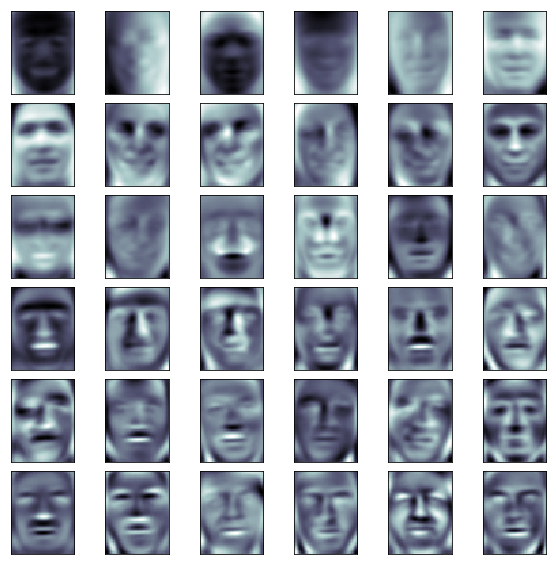

In [11]:
plot_digits(pca.components_)